In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import datetime
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import pickle

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz 
    #In the cmd line type: conda install python-graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [3]:
train_df = pickle.load(open("train_df.dat", "rb"))
#note to call the file from correct folder
test_df = pickle.load(open("test_df.dat", "rb"))

### reparing train_df

In [4]:
# Dropping Appointment_WeekDay from train_df because it is nominal
week_day = pd.get_dummies(train_df["Appointment_WeekDay"])
week_day["AppointmentID"] = train_df["AppointmentID"]
train_df=train_df.merge(week_day, how='left', on='AppointmentID')
train_df = train_df.drop(['Appointment_WeekDay'], axis=1)

In [5]:
# The same for neighborhood for df_train
neighborhood = pd.get_dummies(train_df["Neighbourhood_codes"])
neighborhood["AppointmentID"] = train_df["AppointmentID"]
train_df=train_df.merge(neighborhood, how='left', on='AppointmentID')
train_df = train_df.drop(['Neighbourhood_codes'], axis=1)
train_df.head()

,PatientId,AppointmentID,Age,Gender_,From_Schedualing_to_Appoitment,prcp,temp,Scholarship,Hipertension,Diabetes,...,72,73,74,75,76,77,78,79,80,81
0,3.896630e+12,5755386,49,0,0,0.4,23.866667,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,9.529640e+14,5661282,18,0,4,0.0,25.554167,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.934430e+12,5641643,38,0,4,0.0,21.941667,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,6.973700e+14,5771112,64,0,4,0.0,24.045833,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5.422850e+12,5619362,45,0,8,0.0,24.375000,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### reparing test_df

In [6]:
# Dropping Appointment_WeekDay from test_df because it is nominal
week_day = pd.get_dummies(test_df["Appointment_WeekDay"])
week_day["AppointmentID"] = test_df["AppointmentID"]
test_df=test_df.merge(week_day, how='left', on='AppointmentID')
test_df = test_df.drop(['Appointment_WeekDay'], axis=1)

In [7]:
# The same for neighborhood for test_df
neighborhood = pd.get_dummies(test_df["Neighbourhood_codes"])
neighborhood["AppointmentID"] = test_df["AppointmentID"]
test_df=test_df.merge(neighborhood, how='left', on='AppointmentID')
test_df = test_df.drop(['Neighbourhood_codes'], axis=1)

# stop here - did not do this for STD / Normelized

In [10]:
train_df.columns

Index([                     'PatientId',                  'AppointmentID',
                                  'Age',                        'Gender_',
       'From_Schedualing_to_Appoitment',                           'prcp',
                                 'temp',                    'Scholarship',
                         'Hipertension',                       'Diabetes',
                           'Alcoholism',                        'Handcap',
                         'SMS_received',                       'No-show_',
                                  '2_x',                            '3_x',
                                  '4_x',                            '5_x',
                                  '6_x',                            '7_x',
                                      1,                            '2_y',
                                  '3_y',                            '4_y',
                                  '5_y',                            '6_y',
                         

In [ ]:
#train_df = train_df[train_df.From_Schedualing_to_Appoitment >0]

In [9]:
y = train_df["No-show_"]
X = train_df.drop(['PatientId','AppointmentID','No-show_'], axis = 1)

# The big tree -  working


In [30]:
tree_clf = DecisionTreeClassifier (max_depth = 4)
tree_clf.fit (X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

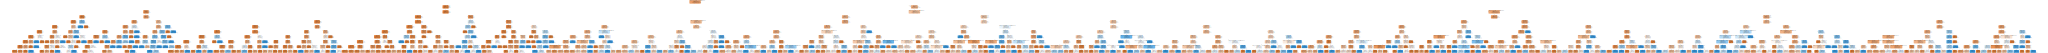

In [19]:
dot_data = export_graphviz(tree_clf, out_file = None, 
                           feature_names = [
                                  'Age',                        'Gender_',
       'From_Schedualing_to_Appoitment',                           'prcp',
                                 'temp',                    'Scholarship',
                         'Hipertension',                       'Diabetes',
                           'Alcoholism',                        'Handcap',
                         'SMS_received',                       
                                  '2_x',                            '3_x',
                                  '4_x',                            '5_x',
                                  '6_x',                            '7_x',
                                      1,                            '2_y',
                                  '3_y',                            '4_y',
                                  '5_y',                            '6_y',
                                  '7_y',                                8,
                                      9,                               10,
                                     11,                               12,
                                     13,                               14,
                                     15,                               16,
                                     17,                               18,
                                     19,                               20,
                                     21,                               22,
                                     23,                               24,
                                     25,                               26,
                                     27,                               28,
                                     29,                               30,
                                     31,                               32,
                                     33,                               34,
                                     35,                               36,
                                     37,                               38,
                                     39,                               40,
                                     41,                               42,
                                     43,                               44,
                                     45,                               46,
                                     47,                               48,
                                     49,                               50,
                                     51,                               53,
                                     54,                               55,
                                     56,                               57,
                                     58,                               59,
                                     60,                               61,
                                     62,                               63,
                                     64,                               65,
                                     66,                               67,
                                     68,                               69,
                                     70,                               71,
                                     72,                               73,
                                     74,                               75,
                                     76,                               77,
                                     78,                               79,
                                     80,                               81], 
                           class_names = ["Show", "No-Show_"],
                           rounded = True, filled=True, special_characters=True)
graph = graphviz.Source(dot_data) 
graph 

In [31]:
y_test = test_df["No-show_"]
X_test = test_df.drop(["No-show_", 'PatientId', 'AppointmentID'], axis = 1)

In [32]:
y_test.value_counts()

0    13800
1     3411
Name: No-show_, dtype: int64

In [33]:
y_test_predict = tree_clf.predict (X_test)

In [34]:
conf_matrix = confusion_matrix(y_test, y_test_predict)
conf_matrix

array([[13796,     4],
       [ 3408,     3]], dtype=int64)

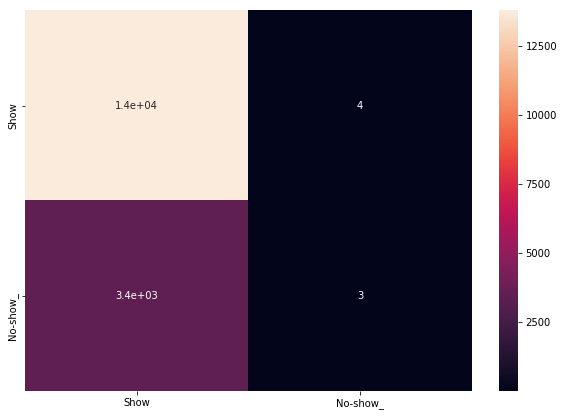

In [36]:
df_cm = pd.DataFrame(conf_matrix, index = [i for i in ["Show","No-show_"]],
                  columns = [i for i in ["Show","No-show_"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [ ]:
confusion_matrix(y, tree_clf.predict (X))

In [35]:
print("The recall for the large tree is ",recall_score(y_test, y_test_predict))  #large tree
print("The precision for the large tree is ",precision_score(y_test, y_test_predict))  #large tree

The recall for the large tree is  0.0008795074758135445
The precision for the large tree is  0.42857142857142855


### end big tree

In [ ]:
#tree_clf.predict_proba([[18,1]])

In [ ]:
plt.scatter(data = train_df[train_df['No-show_']==0], c="blue", x="Age" , y="Alcoholism", alpha=0.05)
plt.scatter(data = train_df[train_df['No-show_']==1], c="red", x="Age" , y="Alcoholism", alpha=0.05)
plt.axhline(y=0.465, color="grey")
plt.axhline(y=0.115, color="grey")
plt.axvline(x=4.5, color="grey")
plt.title('Scatter plot')
plt.xlabel("Age")
plt.ylabel("Alcoholism")
plt.show()

In [ ]:
plt.scatter(data = train_df[train_df['No-show_']==0], c="blue", x="Age" , y="prcp", alpha=0.05)
plt.scatter(data = train_df[train_df['No-show_']==1], c="red", x="Age" , y="prcp", alpha=0.05)
plt.axhline(y=0.465, color="grey")
plt.axhline(y=0.115, color="grey")
plt.axvline(x=4.5, color="grey")
plt.title('Scatter plot')
plt.xlabel("Age")
plt.ylabel("prcp")
plt.show()

In [ ]:
#tree_clf_large = DecisionTreeClassifier (max_depth = 2)
#tree_clf_large.fit (X, y)

In [ ]:
#dot_data = export_graphviz(tree_clf_large, out_file = None, 
                           feature_names = list(X), 
                           class_names = ["Show", "No-Show_" ],
                           rounded = True, filled=True, special_characters=True )
graph = graphviz.Source(dot_data ) 
graph

# Examining our results

In [ ]:
y_test = test_df["No-show_"]
X_test = test_df.drop(["No-show_", 'PatientId', 'AppointmentID', 'Neighbourhood_codes'], axis = 1)

In [ ]:
y_test_predict = tree_clf.predict (X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y2_test_predict)
conf_matrix

In [ ]:
df_cm = pd.DataFrame(conf_matrix, index = [i for i in ["Show","No-show_"]],
                  columns = [i for i in ["Show","No-show_"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [ ]:
confusion_matrix(y, tree_clf.predict (X))

In [ ]:
from sklearn.metrics import precision_score, recall_score

print("The recall for the large tree is ",recall_score(y_test, y2_test_predict))  #large tree
print("The precision for the large tree is ",precision_score(y_test, y2_test_predict))  #large tree